In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from requirements.bernouli import Bernouli
model=Bernouli()
model.fit(np.array([0.,1.,1.,1.]))
print(model)


Bernouli(
    mu = 0.75
)


this gives us a severly overfitted results for small data sets 
so we try bayesian approach i.e beta distribution 

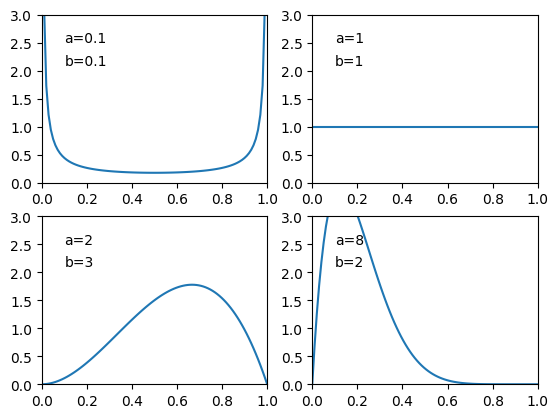

In [3]:
from requirements.beta import Beta
x=np.linspace(0,1,100)
for i, [a,b] in enumerate([[0.1,0.1],[1,1],[2,3],[8,2]]):
    plt.subplot(2,2,i+1)
    beta=Beta(a,b)
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.plot(x, beta.pdf(x))
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))
plt.show()

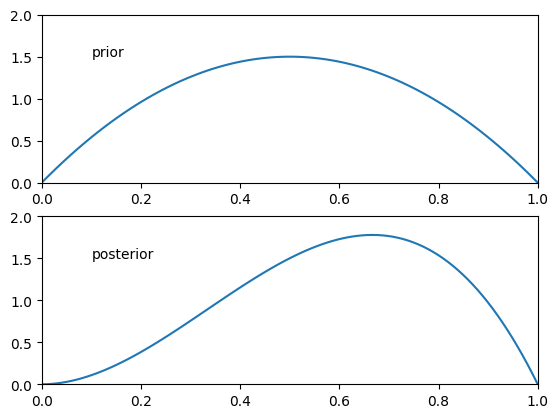

In [4]:
beta = Beta(2, 2)
plt.subplot(2, 1, 1)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, beta.pdf(x))
plt.annotate("prior", (0.1, 1.5))

model = Bernouli(mu=beta)
model.fit(np.array([1]))
plt.subplot(2, 1, 2)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, model.mu.pdf(x))
plt.annotate("posterior", (0.1, 1.5))

plt.show()

In [5]:
print("Maximum likelihood estimation")
model = Bernouli()
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

print("Bayesian estimation")
model = Bernouli(mu=Beta(1, 1))
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

Maximum likelihood estimation
10000 out of 10000 is 1
Bayesian estimation
6648 out of 10000 is 1
